<a href="https://colab.research.google.com/github/Foysal348/Phitron-Assignment/blob/main/ML_Mid_Term_Assignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

_Write your calculations and explanation here. You may use Python below if you want, but final reasoning must be readable._
###1.
Sorted_data_q1=[30, 31, 32, 32, 33, 33, 34, 34, 35, 500]
median_value=(33+33)/2=33
Q1=32,
Q3=34,
IQR=Q3-Q1=34-32=2
###2.
lower=Q1-1.5 * IQR=29,
upper=Q3+1.5 * IQR=37,
Here, 37<<500 ,So 500 is a outlier.
###3.
The median+IQR is better than the mean+standard deviation for this dataset because the value 500 is an extreme outlier. The mean and standard deviation are highly outlier sensitive. For this outlier, the mean and standard deviation would give us misleading information. In contrast, the median and IQR are robust statistics that are not affected by outliers, so they represent the central tendency and spread more accurately. This makes median+IQR much reliable for outlier-containing datasets like this one.


In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]
df=pd.DataFrame(data_q1,columns=['spending'])
median_value=df.median()
print("Median:",median_value)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)
IQR=Q3-Q1
print("IQR:",IQR)


Median: spending    33.0
dtype: float64
Q1: spending    32.0
Name: 0.25, dtype: float64
Q3: spending    34.0
Name: 0.75, dtype: float64
IQR: spending    2.0
dtype: float64


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

_Write your step by step Bayes calculation and explanation here._
###1.
Given,
prevalence of disease=0.01,
True Positive Rate=0.90,
True Negative Rate=0.92,

Therefore,
False Positive Rate=1-0.92=0.08,
Probablities of not having disease=1-0.01=0.99,


From Bayes Theorem,PPV=(0.01 * 0.90)/((0.01 * 0.90)+(0.08 * 0.99))=0.102
So, PPV is 10.2%
So if someone tests positive, there is only about a 10.2% chance they actually have the disease.

###2.
When prevalence rises, PPV increases because the test is applied to a population where disease is more common.In Bayes terms,the numerator becomes larger relative to false positives.That means a positive result is more likely to be a true positive. So with 20% prevalence, PPV would be much higher and the test becomes more reliable.

### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

_Write your task type, preprocessing list, and pipeline paragraph here._
### 1.
The target column (0 or 1 target, denoted as "premium_user") is binary. So, it is a binary classification of ML tasks.
### 2.
Step 1:Handling missing value of numerical features "age" and "daily_clicks" with median imputation.
Step 2:Apply One Hot Encoding for "region" feature.
Step 3:Scale numeric features "age" and "daily_clicks" using StandardScaler or MinMaxScaler.
Step 4: Split the data into train and test dataset using train_test_split.
### 3.
To solve this problem, I would first load the raw dataset and inspect it for missing values or inconsistencies. Next, I would impute missing values in the numeric variables such as "age" and "daily_clicks", using the median to avoid the influence of outliers. Then, I would convert the categorical column "region" into numerical form using One-Hot Encoding. After that, I would scale numerical columns like "age" and "daily_clicks" so that all variables are on a similar range, which is helpful for a distance-based model like KNN for better performance. I would then split the dataset into a train and a test dataset. Then I would select a classification model from SVM, Decision Tree, Random Forest, XGBoost, etc, to train the dataset. I would evaluate it on the test set using metrics like accuracy, precision, F1-score, recall, and ROC-AUC. Finally, I would analyze the results and take further actions to improve the model's performance.

---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

df

,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

###1.Compact EDA using pandas

Missing value summary for each column
age             2
region          0
purchases       1
premium_user    0
dtype: int64


Number of unique values per column
age             5
region          4
purchases       6
premium_user    2
dtype: int64


Correlation among numeric columns
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000


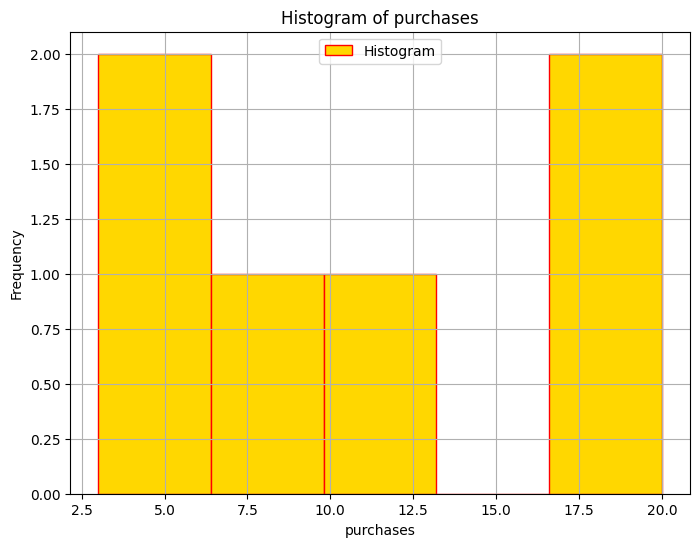

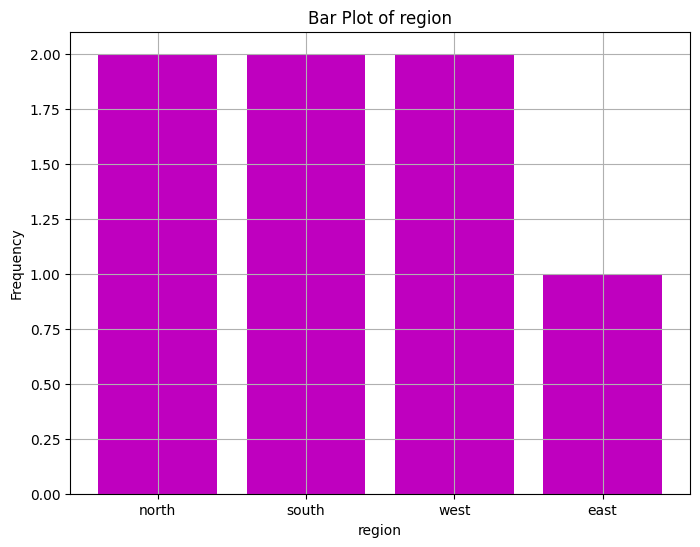

In [ ]:
#We use isna().sum() for missing value summary for each column
print("Missing value summary for each column")
print(df.isna().sum())
print("\n")

#For see the number of unique values per column,we use .nunique()
print("Number of unique values per column")
print(df.nunique())
print("\n")

# Correlation among numeric columns
#We select only numeric columns and compute the correlation matrix.
df_numeric=df.select_dtypes(include=["int64","float64"])
correlation_matrix=df_numeric.corr()
print("Correlation among numeric columns")
print(correlation_matrix)

#Histogram Plot
#We visualize the distribution of purchases column using a histogram
plt.figure(figsize=(8,6))
plt.hist(x="purchases",data=df,bins=5,label="Histogram",color='gold',edgecolor="red")
plt.title("Histogram of purchases")
plt.xlabel("purchases")
plt.ylabel("Frequency")
plt.legend()
plt.show()

#Bar Plot
#We count how many users are in each region and show it with a bar chart
counts = df['region'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(counts.index,counts.values,linewidth=1.2,color="m")
plt.title("Bar Plot of region")
plt.xlabel("region")
plt.ylabel("Frequency")
plt.show()

### 2.Preprocess the dataset using sklearn plus pandas
Impute age and purchases with respect to median and mean.We apply One-Hot Encoding for region.Keep a copy for Next domain-driven feature.
We import SimpleImputer and RobustScaler, then copy the original dataframe for preprocessing.

In [ ]:
#Create a copy
df_processed = df.copy()

#impute age with median
df_age = pd.DataFrame(df_processed["age"])
imputer_age = SimpleImputer(strategy="median")
df_age = pd.DataFrame(imputer_age.fit_transform(df_age), columns=["age"])
df_processed["age"] = df_age["age"]

#Impute purchases with mean
df_purchases = pd.DataFrame(df_processed["purchases"])
imputer_purchases = SimpleImputer(strategy="mean")
df_purchases = pd.DataFrame(imputer_purchases.fit_transform(df_purchases), columns=["purchases"])
df_processed["purchases"] = df_purchases

#One-Hot Encoding for region
one_hot = pd.get_dummies(df_processed['region'], prefix='region', dtype=int)
df_processed = pd.concat([df_processed.drop("region", axis=1), one_hot], axis=1)

#Keep a copy for Next domain-driven feature
df_processed["purchases_original"] = df_processed["purchases"]

#Scale all numeric columns using RobustScaler
numeric_cols=['age','purchases']
Scalar=RobustScaler()
df_processed[numeric_cols]=Scalar.fit_transform(df_processed[numeric_cols])
print(df_processed)


   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0            0             1             0   
1  0.0   0.000000             1            0             0             1   
2  0.0  -0.674157             0            0             1             0   
3 -0.8   0.112360             0            1             0             0   
4  1.5   1.348315             1            0             0             0   
5  2.2   1.078652             1            0             0             0   
6  0.0  -0.134831             0            0             0             1   

   region_west  purchases_original  
0            0            3.000000  
1            0           10.000000  
2            0            5.000000  
3            0           10.833333  
4            1           20.000000  
5            1           18.000000  
6            0            9.000000  


### 3.Create one domain-driven feature
I created a domain-driven binary feature called "high_spender" using the unscaled "purchases_original" column. If a user makes 10 or more purchases, then labelled as high_spender=1, otherwise 0.

In [ ]:
#3.Create one domain driven feature
df_processed["high_spender"] = (df_processed["purchases_original"] >= 10).astype(int)
print(df_processed)

   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0            0             1             0   
1  0.0   0.000000             1            0             0             1   
2  0.0  -0.674157             0            0             1             0   
3 -0.8   0.112360             0            1             0             0   
4  1.5   1.348315             1            0             0             0   
5  2.2   1.078652             1            0             0             0   
6  0.0  -0.134831             0            0             0             1   

   region_west  purchases_original  high_spender  
0            0            3.000000             0  
1            0           10.000000             1  
2            0            5.000000             0  
3            0           10.833333             1  
4            1           20.000000             1  
5            1           18.000000             1  
6            0            9.000000

### 4.The final transformed dataframe

In [ ]:
#Drop the helper column "purchases_original"
Final_df=df_processed.drop("purchases_original",axis=1)

print(Final_df)
print("The final transformed dataframe ready for model training.")

   age  purchases  premium_user  region_east  region_north  region_south  \
0 -0.5  -0.943820             0            0             1             0   
1  0.0   0.000000             1            0             0             1   
2  0.0  -0.674157             0            0             1             0   
3 -0.8   0.112360             0            1             0             0   
4  1.5   1.348315             1            0             0             0   
5  2.2   1.078652             1            0             0             0   
6  0.0  -0.134831             0            0             0             1   

   region_west  high_spender  
0            0             0  
1            0             1  
2            0             0  
3            0             1  
4            1             1  
5            1             1  
6            0             0  
The final transformed dataframe ready for model training.


---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})

df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

### 1.Create the DataFrame df2
Created a DataFrame containing area (sqft), number of bedrooms, and house price.

In [ ]:
df2

,area_sqft,bedrooms,price
0,800,2,120
1,1000,2,150
2,1200,3,170
3,1500,3,210
4,1800,4,260
5,2000,4,300


###2.Split dataset into train and test data
Split the data into train and test with 80 percent train and 20 percent test.

In [ ]:
X=df2.drop("price",axis=1)
y=df2["price"]
#Split dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


###3.Fit Linear Regression Model
Trained a Linear Regression model to predict price using area and bedrooms.

In [ ]:
#Model Initialize
model=LinearRegression()
#Fit Linear Regression Model
model.fit(X_train,y_train)

LinearRegression()

###4.Print model intercept, coefficients, and predictions
Displayed regression intercept, coefficient values, and predictions for test data.

In [ ]:
#Display Intercept
print("Intercept:",model.intercept_)
#Display Coefficients
print("Coefficients:",model.coef_)
#Display Predictions
y_pred=model.predict(X_test)
print("Predictions of test set:",y_pred)

Intercept: -33.84615384615387
Coefficients: [0.15384615 5.38461538]
Predictions of test set: [100.         130.76923077]


###5.Compute the following metrics on the test set
Calculate model Performance metrics on test set.
Lower MAE and RMSE indicate better predictions and if R square is near to 1 indicates strong predictive power.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 19.615384615384613
Root Mean Squared Error (RMSE): 19.61915499208746
R-squared (R²): -0.7107166337935567


###6. Residual Plot
Residuals are far from zero and show large errors.
This suggests the model does not fit the test data well.

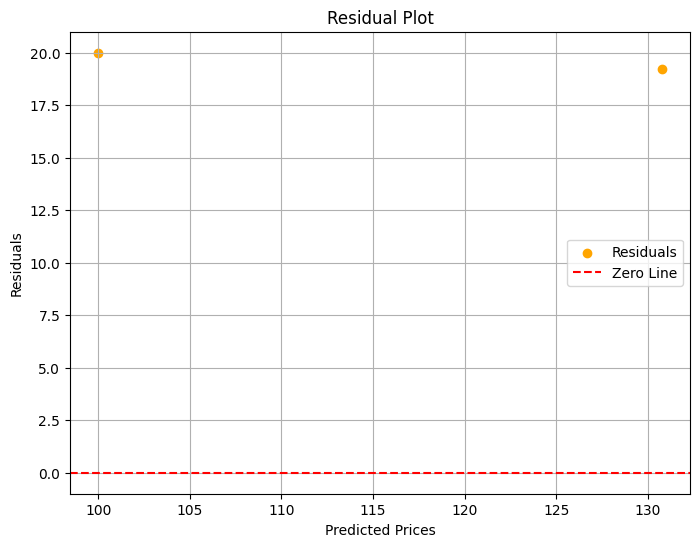

In [ ]:
#Calculate Residuals
residuals=y_test-y_pred
#Plot Residuals
plt.figure(figsize=(8,6))
plt.scatter(y_pred,residuals,color="orange",label="Residuals")
plt.axhline(y=0,color="red",linestyle="--",label="Zero Line")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


## Part 1: Threshold based classification and metrics


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
def evaluate_threshold(threshold):
    y_pred = (y_prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return y_pred, cm, precision, recall, f1

#1.Threshold Evaluation when Threshold = 0.5
pred_05, cm_05, precision_05, recall_05, f1_05 = evaluate_threshold(0.5)
print("Threshold = 0.5")
print("Confusion Matrix:\n", cm_05)
print("Precision:", precision_05)
print("Recall:", recall_05)
print("F1 Score:", f1_05, "\n")

#2.Threshold Evaluation when Threshold = 0.3
pred_03, cm_03, precision_03, recall_03, f1_03 = evaluate_threshold(0.3)
print("Threshold = 0.3")
print("Confusion Matrix:\n", cm_03)
print("Precision:", precision_03)
print("Recall:", recall_03)
print("F1 Score:", f1_03, "\n")


Threshold = 0.5
Confusion Matrix:
 [[5 0]
 [0 5]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0 

Threshold = 0.3
Confusion Matrix:
 [[3 2]
 [0 5]]
Precision: 0.7142857142857143
Recall: 1.0
F1 Score: 0.8333333333333334 



### 3.explain ,what happend when the threshold change from 0.5 to 0.3
Lowering the threshold from 0.5 to 0.3 increased positive predictions, so recall stayed at 1.0 because the model still found all positives.
However, precision dropped due to more false positives.
This happens because a lower threshold makes the classifier more lenient, improving recall but reducing precision.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

## Part 2: ROC and AUC

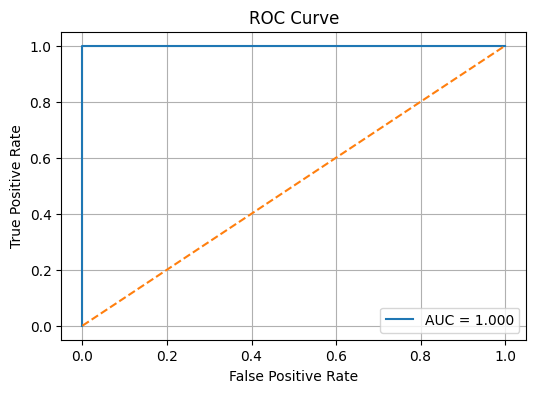

AUC: 1.0


In [ ]:
#4.Plot the ROC curve
fpr, tpr, _ = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#5.Compute the AUC
print("AUC:", round(roc_auc, 3))
#6.one or two line comment
#A high AUC (close to 1.0) means the classifier can accurately distinguish between positive and negative cases.
#In this context, an AUC of 1.0 indicates perfect classification performance with no ranking errors.

## Part 3: Decision Tree on a small dataset

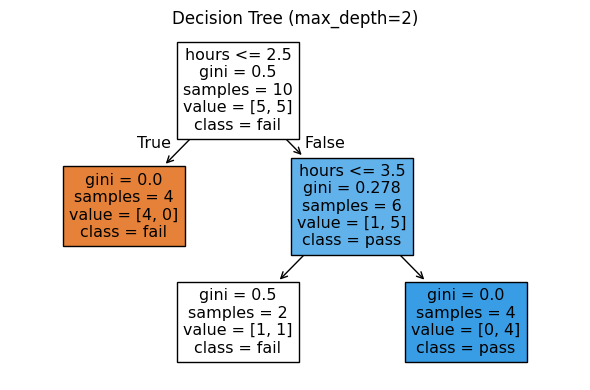

In [ ]:
#7.Fit the Decision Tree model with mas_depth=2
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
X=df3[["hours"]]
y=df3["passed"]

model_tree=DecisionTreeClassifier(max_depth=2, random_state=42)
model_tree.fit(X, y)

#8. Plot the tree
plt.figure(figsize=(6,4))
plot_tree(model_tree, feature_names=["hours"], class_names=["fail","pass"], filled=True)
plt.title("Decision Tree (max_depth=2)")
plt.tight_layout()
plt.show()



9.The tree is not deep (max_depth=2), so it only learns simple rules from study hours and helps avoid severe overfitting.But since the dataset is very small, the model may still struggle to generalize well to new students.